In [ ]:
from sklearn import metrics
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
url = "validation.csv"
valset = pd.read_csv(url)
valset = valset.drop('Unnamed: 0',axis=1).copy()
valsettarget = valset['Edible'].copy()
valset = valset.drop('Edible',axis=1).copy()
display(valset)

url = "training.csv"
trainingset = pd.read_csv(url)
trainingset = trainingset.drop('Unnamed: 0',axis=1).copy()
trainingsettarget = trainingset['Edible'].copy()
trainingset = trainingset.drop('Edible',axis=1).copy()
display(trainingset)

url = "test.csv"
testset = pd.read_csv(url)
testset = testset.drop('Unnamed: 0',axis=1).copy()
testsettarget = testset['Edible'].copy()
testset = testset.drop('Edible',axis=1).copy()
display(testset)

,cap-color,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-number,ring-type,population
0,9,0,0,10,4,2,3,1,4,3
1,8,0,0,4,2,2,2,1,4,3
2,3,0,0,10,1,2,2,1,4,5
3,2,0,0,1,0,2,2,2,0,1
4,4,0,0,7,4,2,3,1,4,5
...,...,...,...,...,...,...,...,...,...,...
1620,3,1,0,3,3,0,0,1,0,3
1621,9,0,0,3,1,1,1,1,2,5
1622,4,0,1,0,0,1,2,1,0,4
1623,5,0,1,9,1,2,2,1,4,3


,cap-color,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-number,ring-type,population
0,3,1,0,10,0,2,2,2,4,2
1,9,0,0,3,1,1,1,1,2,5
2,4,0,0,5,1,2,2,1,4,5
3,4,0,0,10,4,2,3,1,4,3
4,2,0,1,0,0,2,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...
4869,4,0,0,9,1,2,2,1,4,4
4870,3,0,0,5,1,2,2,1,4,5
4871,4,0,0,7,1,2,2,1,4,5
4872,4,1,0,4,3,2,0,1,0,0


,cap-color,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-number,ring-type,population
0,3,0,0,7,1,2,2,1,4,5
1,2,0,0,7,1,2,2,1,4,5
2,8,0,0,7,1,0,0,1,4,4
3,4,0,1,0,0,1,1,1,0,4
4,2,0,1,0,0,2,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...
1620,3,0,0,10,1,2,0,1,4,4
1621,4,0,1,0,0,2,1,1,0,4
1622,4,0,1,0,0,2,1,1,0,4
1623,3,0,0,3,1,1,1,1,2,5


0.9549228944246738
0.928
0.9322524609148812
0.9269499382609302
0.8989769820971867


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


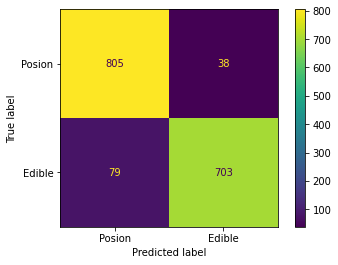

In [ ]:
clf = SVC(kernel='linear')
clf.fit(trainingset,trainingsettarget)
test_pred = clf.predict(testset)
a = classification_report(testsettarget,test_pred,output_dict = 'true')

sensitivity = a['0']['recall']
print(a['0']['recall'])
accuracy = a['accuracy']
print(a['accuracy'])
f1 = a['0']['f1-score']
print(a['0']['f1-score'])

tn, fp, fn, tp = confusion_matrix(testsettarget,test_pred).ravel()
fpr, tpr, thresholds = metrics.roc_curve(testsettarget,test_pred)
auc= metrics.auc(fpr, tpr)
print(auc)
specificity = tp/(tp + fn) 
print(specificity)
plot_confusion_matrix(clf,testset,testsettarget,display_labels = ["Posion","Edible"])

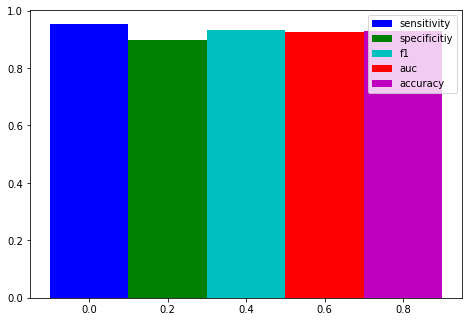

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Performance = ["sensitivity","specificitiy","f1",'auc','accuracy']
X_axis=0
ax.bar(X_axis + 0.0, sensitivity,  0.2,color = 'b', label = "sensitivity" )
ax.bar(X_axis + 0.2, specificity,  0.2,color = 'g', label = "specificity" )
ax.bar(X_axis + 0.4, f1,  0.2,color = 'c', label = "f1")
ax.bar(X_axis + 0.6, auc, 0.2, color = 'r', label = "auc" )
ax.bar(X_axis + 0.8, accuracy, 0.2, color = 'm', label = "accuracy" )
plt.legend(Performance)
fig.savefig('plot.png')

In [ ]:
print(clf.get_params(deep=True))

from joblib import dump, load
dump(clf, 'svm.joblib')



{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


['svm.joblib']